# PRETRATAMIENTO DATASET INRIA

## Configuración

In [ ]:
# importamos las librerías necesarias
import os
import random

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from PIL import Image

from google.colab import (
    files,
    drive
    )

In [ ]:
# Rutas
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
ROOT_DIR = "/content/drive/MyDrive/TFM/dataset/"

IMAGES_DIR = os.path.join(ROOT_DIR, 'inria/Images')
MASKS_DIR = os.path.join(ROOT_DIR, 'inria/Masks')
OUTPUT_IMAGES_DIR = os.path.join(ROOT_DIR, 'Processed Images')
OUTPUT_MASKS_DIR = os.path.join(ROOT_DIR, 'Processed Masks')
EMPTY_IMAGES_DIR = os.path.join(ROOT_DIR, 'Empty Images')
EMPTY_MASKS_DIR = os.path.join(ROOT_DIR, 'Empty Masks')

CROP_PIXELS = 1000

# Conectamos con nuestro Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creamos los directorios si no existen
os.makedirs(OUTPUT_IMAGES_DIR, exist_ok=True)
os.makedirs(OUTPUT_MASKS_DIR, exist_ok=True)

os.makedirs(EMPTY_IMAGES_DIR, exist_ok=True)
os.makedirs(EMPTY_MASKS_DIR, exist_ok=True)

## Inspeccionar DataSet

Vamos a comprobar de que carpetas se compone, como son las imágenes, que características tienen, etc.

In [ ]:
# 1. Mostrar algunos nombres de los ficheros .tif
sample_files = os.listdir(IMAGES_DIR)[:5]
print("Algunos nombres de archivos de imagen:\n", sample_files)

Algunos nombres de archivos de imagen:
 ['tyrol-w1.tif', 'tyrol-w2.tif', 'tyrol-w3.tif', 'tyrol-w4.tif', 'tyrol-w5.tif']


In [ ]:
# 2. Tamaño de los ficheros en Mb, alto x ancho en píxeles, número de imágenes y máscaras.
image_files = [f for f in os.listdir(IMAGES_DIR) if f.endswith('.tif')]
mask_files = [f for f in os.listdir(MASKS_DIR) if f.endswith('.tif')]

# Ordenamos las imágenes
image_files = sorted(image_files)
mask_files = sorted(mask_files)

print(f"Número total de imágenes: {len(image_files)}")
print(f"Número total de máscaras: {len(mask_files)}")

sample_img_path = os.path.join(IMAGES_DIR, image_files[0])
sample_img = Image.open(sample_img_path)
print(f"Dimensiones de las imágenes (Alto x Ancho): {sample_img.size}")
print(f"Espacio en disco de una imagen de muestra: {os.path.getsize(sample_img_path) / (1024*1024):.2f} MB")

Número total de imágenes: 180
Número total de máscaras: 180
Dimensiones de las imágenes (Alto x Ancho): (5000, 5000)
Espacio en disco de una imagen de muestra: 71.56 MB


In [ ]:
# 3. Número de imágenes para cada ciudad
city_counts = defaultdict(int)
for fname in image_files:
    city_name = ''.join([char for char in fname if not char.isdigit()]).replace('.tif', '')
    city_counts[city_name] += 1

print("\nNúmero de imágenes por ciudad:")
for city, count in city_counts.items():
    print(f"{city}: {count}")


Número de imágenes por ciudad:
austin: 36
chicago: 36
kitsap: 36
tyrol-w: 36
vienna: 36


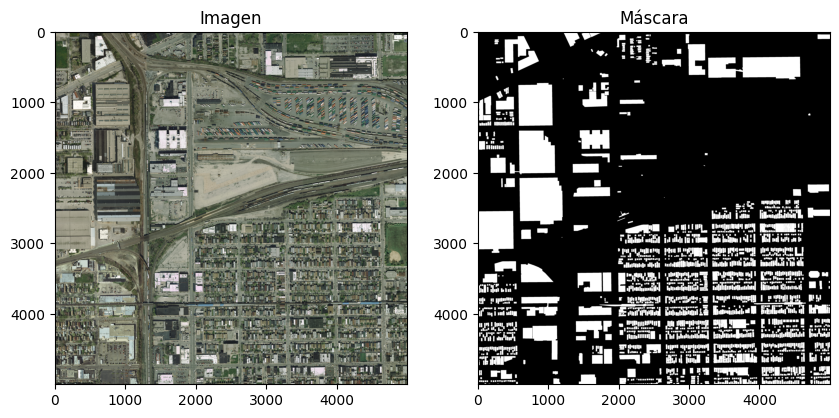

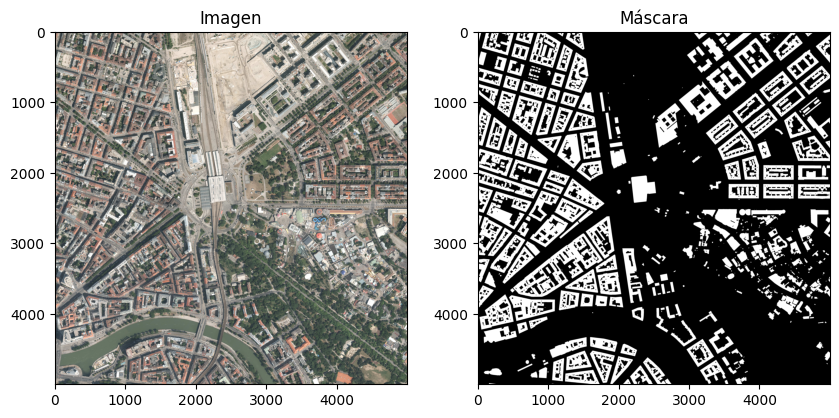

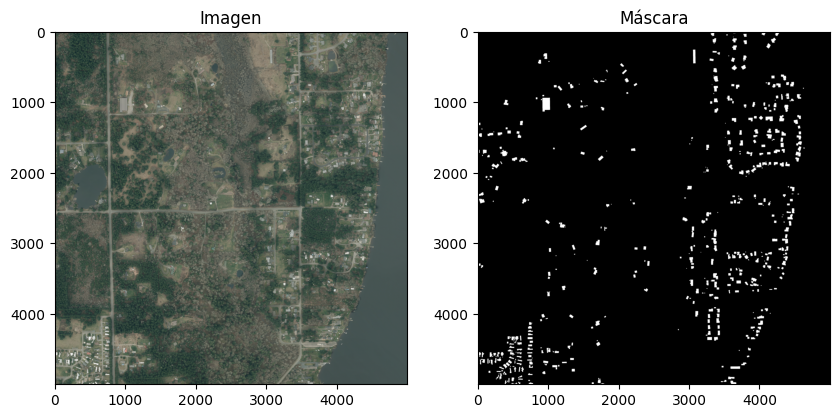

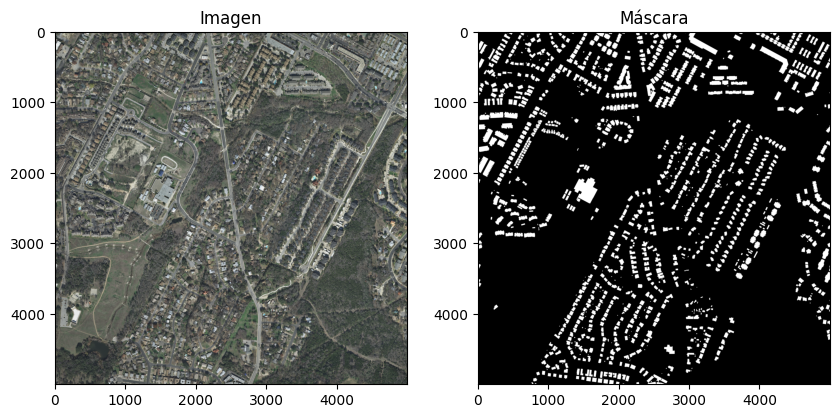

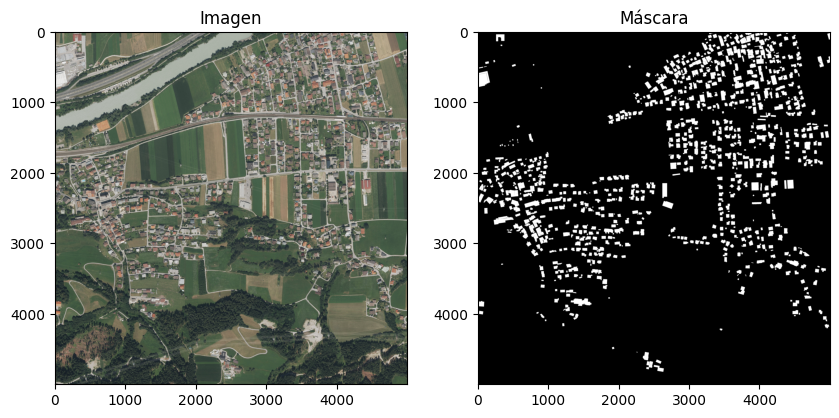

In [ ]:
# 4. Pintamos algunas imágenes aleatorias del dataset junto con sus máscaras.
sample_indices = np.random.choice(len(image_files), 5, replace=False)

for idx in sample_indices:
    img_path = os.path.join(IMAGES_DIR, image_files[idx])
    mask_path = os.path.join(MASKS_DIR, mask_files[idx])

    img = Image.open(img_path)
    mask = Image.open(mask_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Imagen")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Máscara")

    plt.show()

In [ ]:
# 5. Mostrar las características de las imágenes
img_array = np.array(sample_img)
print(f"Número de canales: {img_array.shape[2]}")
print(f"Valores únicos en la imagen de muestra:\n{np.unique(img_array)}")

Número de canales: 3
Valores únicos en la imagen de muestra:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23

Total de píxeles de edificios: 710215250
Total de píxeles de fondo: 3789784750


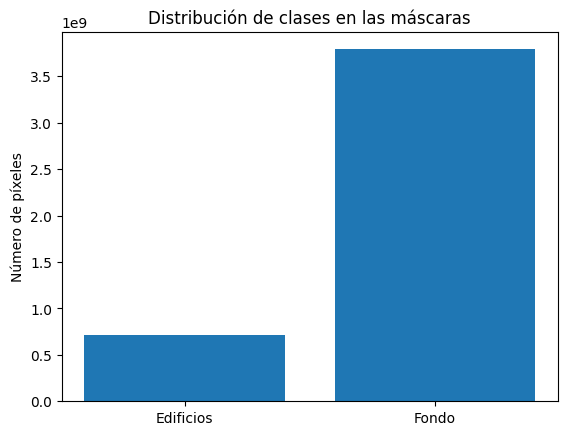

In [ ]:
# 6. Distribución de clases en las máscaras
building_counts = []
background_counts = []

for fname in os.listdir(MASKS_DIR):
    mask = np.array(Image.open(os.path.join(MASKS_DIR, fname)))
    building_counts.append(np.sum(mask > 0))
    background_counts.append(np.sum(mask == 0))

print(f"Total de píxeles de edificios: {sum(building_counts)}")
print(f"Total de píxeles de fondo: {sum(background_counts)}")

plt.bar(["Edificios", "Fondo"], [sum(building_counts), sum(background_counts)])
plt.title("Distribución de clases en las máscaras")
plt.ylabel("Número de píxeles")
plt.show()

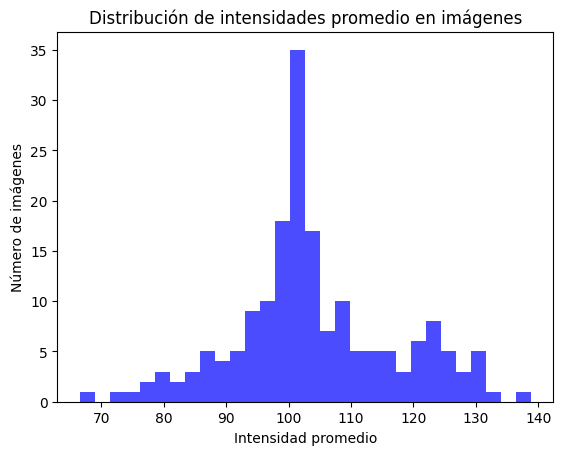

In [ ]:
# 7. Variabilidad en la iluminación entre imágenes
mean_intensities = []

for fname in os.listdir(IMAGES_DIR):
    img = np.array(Image.open(os.path.join(IMAGES_DIR, fname)))
    mean_intensity = np.mean(img)
    mean_intensities.append(mean_intensity)

plt.hist(mean_intensities, bins=30, color='blue', alpha=0.7)
plt.title("Distribución de intensidades promedio en imágenes")
plt.xlabel("Intensidad promedio")
plt.ylabel("Número de imágenes")
plt.show()

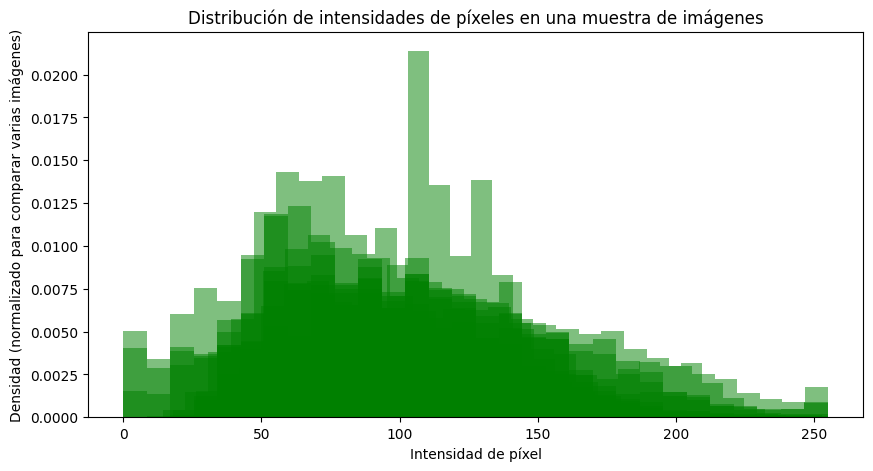

In [ ]:
# 8. Histograma de intensidades de imagen de un subconjunto de imágenes
sample_size = 10  # Tomaremos una muestra de 10 imágenes para no sobrecargar la memoria
sample_files = np.random.choice(os.listdir(IMAGES_DIR), sample_size, replace=False)

plt.figure(figsize=(10, 5))
for fname in sample_files:
    img = np.array(Image.open(os.path.join(IMAGES_DIR, fname)))
    plt.hist(img.ravel(), bins=30, color='green', alpha=0.5, density=True)

plt.title("Distribución de intensidades de píxeles en una muestra de imágenes")
plt.xlabel("Intensidad de píxel")
plt.ylabel("Densidad (normalizado para comparar varias imágenes)")
plt.show()


## Procesamiento de los datos

> Hemos comprobado en pasos anteriores que son imágenes muy grandes que no se podrán procesar por ningún modelo sin agotar la memoria de la GPU.
Por lo tanto lo que se va a hacer es dividir las imágenes que originalmente tienen tamaño de 5000x5000 pixeles, en imágenes de 1000x1000. De este modo también aumentamos el número de imágenes de nuestro dataset.

In [ ]:
def divide_and_save(file_name, pixels, index):
    img = np.array(Image.open(os.path.join(IMAGES_DIR, file_name)))
    mask = np.array(Image.open(os.path.join(MASKS_DIR, file_name)))

    img_h, img_w, _ = img.shape
    for i in range(0, img_h, pixels):
        for j in range(0, img_w, pixels):
            cropped_img = img[i:i+pixels, j:j+pixels]
            cropped_mask = mask[i:i+pixels, j:j+pixels]

            # Check if the mask is empty
            is_empty = np.sum(cropped_mask) == 0

            # Name pattern change based on emptiness
            prefix = "empty_" if is_empty else ""

            img_name = f"{prefix}{index}.tif"
            mask_name = f"{prefix}{index}.tif"
            #npy_name = f"{prefix}{index}.npy"

            Image.fromarray(cropped_img.astype(np.uint8)).save(os.path.join(OUTPUT_IMAGES_DIR, img_name))
            Image.fromarray(cropped_mask.astype(np.uint8)).save(os.path.join(OUTPUT_MASKS_DIR, mask_name))
            #np.save(os.path.join(OUTPUT_IMAGES_DIR, npy_name), cropped_img)

            index += 1

    return index

Como habrá imágenes vacías, sin edificios que segmentar, vamos a comprobar que no sean demasiadas imágenes, en principio no vamos a permitir más del 15% de imágenes vacías, si hay más moveremos algunas de estas imágenes a otra carpeta separada.

In [ ]:
import random
import shutil

def manage_empty_images(percentage=0.15):
    # Movemos todas las imágenes y máscaras vacías a las carpetas de salida
    for img_name in os.listdir(EMPTY_IMAGES_DIR):
        shutil.move(os.path.join(EMPTY_IMAGES_DIR, img_name), OUTPUT_IMAGES_DIR)

    for mask_name in os.listdir(EMPTY_MASKS_DIR):
        shutil.move(os.path.join(EMPTY_MASKS_DIR, mask_name), OUTPUT_MASKS_DIR)

    # Determinamos cuántas imágenes vacías debemos mantener
    empty_images = [f for f in os.listdir(OUTPUT_IMAGES_DIR) if f.startswith("empty_")]
    non_empty_images = [f for f in os.listdir(OUTPUT_IMAGES_DIR) if not f.startswith("empty_")]

    num_empty_to_keep = int(percentage * len(non_empty_images))

    print(f"Imágenes vacías: {len(empty_images)}\nMáximo de Imágenes sin objetos que podemos tener: {num_empty_to_keep}")
    if num_empty_to_keep >= len(empty_images): # Si no pasamos del umbral de imágenes vacías, finalizamos y no movemos ninguna
      return

    # Seleccionar aleatoriamente las imágenes vacías que exceden ese número
    excess_empty_images = random.sample(empty_images, len(empty_images) - num_empty_to_keep)

    # Mover las imágenes y máscaras seleccionadas de regreso a las carpetas vacías
    for file_name in excess_empty_images:
        shutil.move(os.path.join(OUTPUT_IMAGES_DIR, file_name), EMPTY_IMAGES_DIR)
        shutil.move(os.path.join(OUTPUT_MASKS_DIR, file_name), EMPTY_MASKS_DIR)



> Ejecución de funciones:

In [ ]:
# Verificación de ficheros existentes e indice a seguir
existing_files = os.listdir(OUTPUT_IMAGES_DIR)

existing_numbers = [int(f.split('.')[0]) for f in existing_files if not f.startswith("empty_")]
max_number = max(existing_numbers, default=0)

print(f"Numeración a seguir en función de las imágenes ya presentes en el dataset:\n{max_number}")

# Procesamiento principal
for fname in os.listdir(IMAGES_DIR):
  max_number = divide_and_save(fname, CROP_PIXELS, max_number)

[]
Numeración a seguir en función de las imágenes ya presentes en el dataset:
0


In [ ]:
# Nos quedamos con un porcentaje de imágenes vacías
manage_empty_images(0.15)

Imágenes vacías: 328
Máximo de Imágenes sin objetos que podemos tener: 625
